<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/9_Sonar_Classification_using_Dense_deep_learning_with_grid_search_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Baseline Model on the Sonar Dataset
from sklearn.model_selection import GridSearchCV
import numpy
import pandas
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [ ]:
from tensorflow.keras.optimizers import SGD
import pandas as pd


In [ ]:
data=("https://raw.githubusercontent.com/rohailkhan/data/main/sonar.csv")
sonar=pd.read_csv(data ,error_bad_lines=False)
sonar.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [ ]:
sonar.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,0.236376,0.250666,0.273544,0.297689,0.321429,0.379217,0.416495,0.453055,0.504797,0.563449,0.609209,0.624841,0.648010,0.673223,0.675444,0.700148,0.702115,0.693473,0.641895,0.581871,0.506281,0.439903,0.416761,0.401535,0.390343,0.382597,0.362331,0.338353,0.324986,0.311385,0.290403,0.278269,0.246368,0.213053,0.196909,0.160738,0.122537,0.091217,0.051995,0.020366,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,0.132923,0.140264,0.141262,0.164075,0.205158,0.232975,0.264213,0.261947,0.258614,0.263225,0.258434,0.256373,0.250335,0.239555,0.245520,0.237768,0.246252,0.237631,0.240818,0.220864,0.212917,0.213389,0.206907,0.230499,0.257756,0.262755,0.239546,0.212655,0.199210,0.179076,0.170717,0.169137,0.139308,0.132795,0.151924,0.134254,0.087155,0.062496,0.036029,0.013673,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,0.128200,0.133450,0.165750,0.176100,0.166500,0.195900,0.205500,0.241950,0.299050,0.350450,0.397550,0.406350,0.455250,0.540450,0.524800,0.543550,0.529800,0.533950,0.461300,0.414250,0.349300,0.284100,0.257350,0.217550,0.178550,0.154000,0.160000,0.174250,0.172450,0.185900,0.164100,0.158700,0.155200,0.126850,0.094450,0.068400,0.064200,0.044950,0.026300,0.011500,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,0.225100,0.249700,0.265500,0.281900,0.284000,0.307500,0.306800,0.370900,0.434800,0.543000,0.627500,0.667000,0.700700,0.701200,0.722100,0.754500,0.753900,0.731700,0.682500,0.607400,0.490600,0.430300,0.390300,0.349700,0.310800,0.319500,0.303900,0.310400,0.282900,0.279000,0.260500,0.244400,0.221100,0.177600,0.147300,0.121100,0.101500,0.077700,0.044900,0.017900,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,0.301800,0.331600,0.351500,0.386950,0.453050,0.536050,0.660050,0.679100,0.731900,0.809450,0.818050

In [ ]:
sonar.shape

(207, 61)

In [ ]:
sonar.iloc[:,0:60]

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.

In [ ]:
X=sonar.iloc[:,0:60].astype('float')
Y=sonar.iloc[:,60]

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.activations import relu , sigmoid ,tanh

In [ ]:
seed = 7
numpy.random.seed(seed)

In [ ]:
# def base_model():
#   # create model
#   model = Sequential()
#   model.add(Dropout(0.2, input_shape=(60,)))
#   model.add(Dense(60, kernel_initializer='normal', activation='relu'))
#   model.add(Dense(30, kernel_initializer='normal', activation='relu'))
#   model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#   # Compile model
#   sgd = SGD(learning_rate=0.01, momentum=0.9, decay=0.0, nesterov=False)
#   model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#   return model

In [ ]:
def base_model():
  model=Sequential()
  model.add(Dense(units=60,input_dim=60, kernel_initializer='normal'))
  model.add(tf.keras.layers.Activation('relu'))

  model.add(Dense(units=80,input_dim=60, kernel_initializer='normal'))
  model.add(tf.keras.layers.Activation('relu')) 

  model.add(Dense(units=1,activation='sigmoid' ,kernel_initializer='normal'))
  ad = Adam(learning_rate=0.001)

  model.compile(optimizer=ad,loss=tf.keras.losses.BinaryCrossentropy(),
                metrics='accuracy')
  return model

In [ ]:
classifier_wrapper=KerasClassifier(build_fn=base_model, nb_epoch=300,
batch_size=16, verbose=0)

In [ ]:
# keras classifier wrapper has the same parameters as that of Sequential.fit
# fit(
#     x=None, y=None, batch_size=None, epochs=1, verbose='auto',
#     callbacks=None, validation_split=0.0, validation_data=None, shuffle=True,
#     class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None,
#     validation_steps=None, validation_batch_size=None, validation_freq=1,
#     max_queue_size=10, workers=1, use_multiprocessing=False
# 
# classifier_wrapper.fit(x=X, y=encoded_Y, batch_size=20, epochs=300, verbose=0, validation_split=0.0, shuffle=True)

In [ ]:
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)

In [ ]:
results=cross_val_score(estimator=classifier_wrapper ,X=X ,y=encoded_Y, verbose=1,cv=kfold)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.3s finished


In [ ]:
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Visible: 56.12% (6.56%)


## Tuning hyper parameters by gridsearch

In [ ]:
def base_model(optimizer='adam',Kernel_initializer='normal',activation='relu'):
  model=Sequential()
  if activation=='relu':
    model.add(Dense(units=60,input_dim=60, kernel_initializer='normal',activation=activation))
    model.add(Dense(units=80,input_dim=60, kernel_initializer='normal',activation=activation))
  elif activation=='tanh':
    model.add(Dense(units=60,input_dim=60, kernel_initializer='normal',activation=activation))
    model.add(Dense(units=80,input_dim=60, kernel_initializer='normal',activation=activation))
  elif activation=='sigmoid':
    model.add(Dense(units=60,input_dim=60, kernel_initializer='normal',activation=activation))
    model.add(Dense(units=80,input_dim=60, kernel_initializer='normal',activation=activation))
  
  model.add(Dense(units=1,activation='sigmoid' ,kernel_initializer='normal'))
  
  model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),
                metrics='accuracy')
  return model


In [ ]:
activation=['relu','tanh']
batch=[5,10,20]
epochs=[150,200,300]
optimizer=['adam','SGD']
param_dict=dict(activation=activation,optimizer=optimizer,epochs=epochs)

In [ ]:
# grid=GridSearchCV(estimator=KerasClassifier(build_fn=base_model),param_grid=param_dict,cv=5,verbose=2)

In [221]:
grid.fit(X,y=encoded_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation=relu, epochs=150, optimizer=adam .....................
Epoch 1/150


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6/6 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5939
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6727
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6727
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6727
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.6727
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.6727
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6727
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.6727
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.6727
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.6727
Epoch 11/150
6/6 [=======================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
Epoch 214/300
6/6 [==============================] - 0s 5ms/step - loss: 0.2052 - accuracy: 0.9091
Epoch 215/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.9152
Epoch 216/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9333
Epoch 217/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9212
Epoch 218/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9091
Epoch 219/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2036 - accuracy: 0.9394
Epoch 220/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2043 - accuracy: 0.9455
Epoch 221/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.9273
Epoch 222/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1999 - accuracy: 0.9333
Epoch 223/300
6/6 [==============================] - 0s 4m

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.6min finished


Epoch 1/300
7/7 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.4976
Epoch 2/300
7/7 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5362
Epoch 3/300
7/7 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.5362
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.5556
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6329
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.6715
Epoch 7/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6098 - accuracy: 0.6908
Epoch 8/300
7/7 [==============================] - 0s 4ms/step - loss: 0.5919 - accuracy: 0.7198
Epoch 9/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5490 - accuracy: 0.7391
Epoch 10/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5187 - accuracy: 0.7488
Epoch 11/300
7/7 [===========

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc09dd36750>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['relu', 'tanh'],
                         'epochs': [150, 200, 300],
                         'optimizer': ['adam', 'SGD']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [222]:
print("Best accuracy: {}\nBest combination: {}".format(grid.best_score_, 
                             grid.best_params_))

Best accuracy: 0.5840882778167724
Best combination: {'activation': 'tanh', 'epochs': 300, 'optimizer': 'adam'}


In [235]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

In [236]:
d=pd.DataFrame(params)
d['Mean']=means
d['Std. Dev']=stds

In [237]:
d.head()

,activation,epochs,optimizer,Mean,Std. Dev
0,relu,150,adam,0.521951,0.110489
1,relu,150,SGD,0.512195,0.088278
2,relu,200,adam,0.507898,0.130260
3,relu,200,SGD,0.531707,0.143138
4,relu,300,adam,0.512311,0.084660


In [246]:
d.to_csv('/content/drive/MyDrive/20210309_Files/sonar_grid_results.csv')

In [247]:
d=pd.read_csv('https://raw.githubusercontent.com/rohailkhan/data/main/sonar_grid_results.csv')

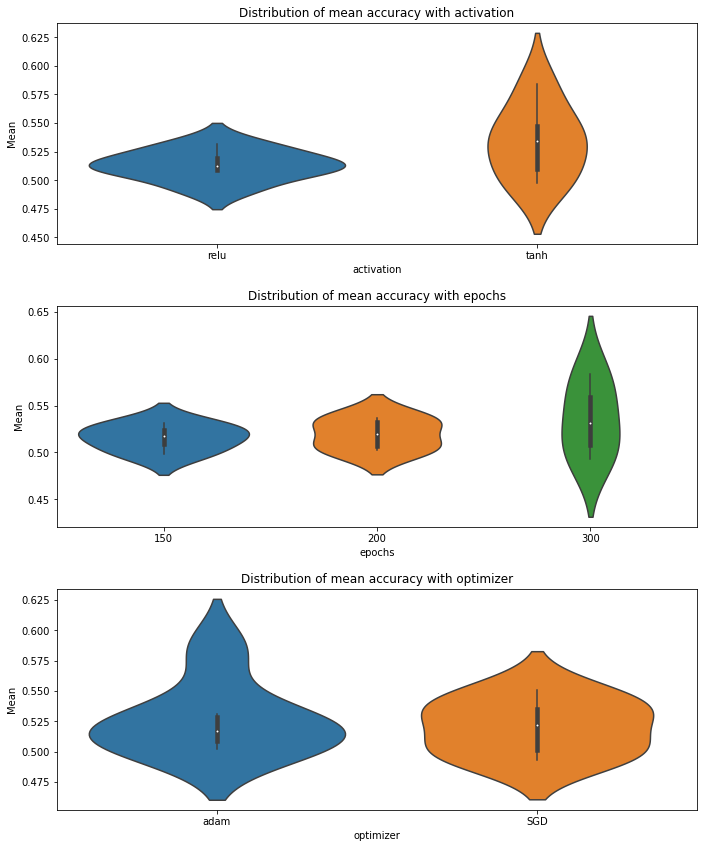

In [244]:
import seaborn as sns
param_ = ['activation',	'epochs',	'optimizer']
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,figsize=(10,12), squeeze=False)
ax = ax.ravel()
for i in range(3):
    ax[i].set_title('Distribution of mean accuracy with {}'.format(param_[i]))
    sns.violinplot(x=param_[i],y='Mean',data=d,ax=ax[i])
fig.tight_layout(pad=1.5)

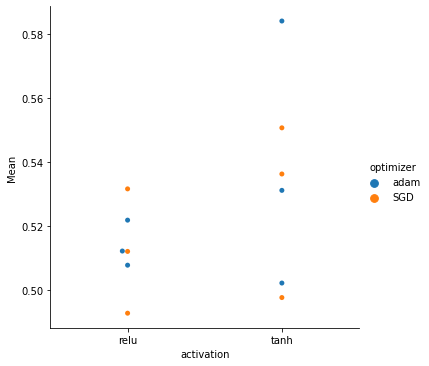

In [248]:
sns.catplot(x="activation", y="Mean", hue="optimizer", kind="swarm", data=d)
plt.show()

# Using the model with these parameters and then repeating experiment with these parameters

In [225]:
def base_model(optimizer='adam',Kernel_initializer='normal',activation='tanh'):
  model=Sequential()
  if activation=='relu':
    model.add(Dense(units=60,input_dim=60, kernel_initializer='normal',activation=activation))
    model.add(Dense(units=80,input_dim=60, kernel_initializer='normal',activation=activation))
  elif activation=='tanh':
    model.add(Dense(units=60,input_dim=60, kernel_initializer='normal',activation=activation))
    model.add(Dense(units=80,input_dim=60, kernel_initializer='normal',activation=activation))
  elif activation=='sigmoid':
    model.add(Dense(units=60,input_dim=60, kernel_initializer='normal',activation=activation))
    model.add(Dense(units=80,input_dim=60, kernel_initializer='normal',activation=activation))
  
  model.add(Dense(units=1,activation='sigmoid' ,kernel_initializer='normal'))
  
  model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),
                metrics='accuracy')
  return model


# Repeating with standardizing the data

In [227]:
standard_scalor=StandardScaler()
estimators=[('stadnderdizing data' ,standard_scalor) , ('Classfication ' ,KerasClassifier(build_fn=base_model, nb_epoch=300,
batch_size=16, verbose=0))]

In [228]:
pipe=Pipeline(steps=estimators)

In [229]:
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)

In [230]:
results=cross_val_score(estimator=pipe ,X=X ,y=encoded_Y, verbose=1,cv=kfold)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.6s finished


In [233]:
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Visible: 70.95% (7.04%)


## Adding dropout

In [303]:
def base_model():
  model=Sequential()
  model.add(Dropout(rate=0.2,input_dim=60))
  model.add(Dense(units=60, kernel_initializer='glorot_uniform',activation='tanh'))
  
  model.add(Dense(units=100,kernel_initializer='glorot_uniform',activation='tanh'))

  

  model.add(Dense(units=60,kernel_initializer='glorot_uniform',activation='tanh'))
  
  model.add(Dense(units=1,activation='sigmoid' ,kernel_initializer='glorot_uniform'))
  ad = Adam(learning_rate=0.001)

  model.compile(optimizer=ad,loss=tf.keras.losses.BinaryCrossentropy(),
                metrics='accuracy')
  return model #74

In [304]:
standard_scalor=StandardScaler()
estimators=[('stadnderdizing data' ,standard_scalor) , ('Classfication ' ,KerasClassifier(build_fn=base_model, nb_epoch=300,
batch_size=16, verbose=0))]
pipe=Pipeline(steps=estimators)
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)

In [305]:
results=cross_val_score(estimator=pipe ,X=X ,y=encoded_Y, verbose=1,cv=kfold)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.6s finished


In [306]:
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Visible: 73.95% (9.03%)
